In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

# Meload data latih dari file data_train_PNN_HIW.csv

In [20]:
train = pd.read_csv('data_train_PNN_HIW.csv')
train.sample()

,id,att1,att2,att3,label
45,45,2.071222,4.036279,3.066076,0


In [21]:
x_train = train[['att1', 'att2', 'att3']]
y_train = train['label']

# Visualisasi data latih menggunakan scatter 3D dengan atribut 1-3 dan warna menurut labelnya 

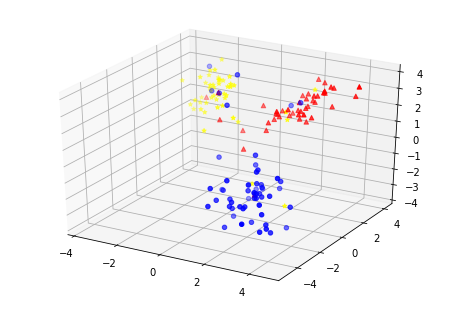

In [22]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_train['att1'][y_train==0],x_train['att2'][y_train==0], x_train['att3'][y_train==0], marker='^', color='red')
ax.scatter(x_train['att1'][y_train==1],x_train['att2'][y_train==1], x_train['att3'][y_train==1], marker='*', color='yellow')
ax.scatter(x_train['att1'][y_train==2],x_train['att2'][y_train==2], x_train['att3'][y_train==2], marker='o', color='blue')

plt.show()

# Gaussian PDF untuk menghitung fungsi gaussian

In [23]:
def gaussian_pdf(x, sigma, w_j):
          
    return math.exp(
        -( ((x[0] - w_j[0])**2) + ((x[1] - w_j[1])**2) + (x[2] - w_j[2])**2)   /
        (2 * sigma**2)
    )

In [37]:
# Matrix W berisi data train
W = np.array(x_train)

# Fungsi predict

In [25]:
def predict(x): # Fungsi predict berfungsi untuk melakukan prediksi pada setiap x (data yang ingin di uji)
    
    # x merupakan input layer yang berisi att1, att2, att3

    sigmas = 0.03889675868182537

    #sigmas =  [0.7629,  0.9324,  1.1105]
    #sigmas = [0.47065078, 0.3643594, 0.39167525]
    patterns = np.zeros(shape=(150)) 
    for i in range(len(W)): #menghitung patterns layer
        #patterns[i] = gaussian_pdf(x, sigmas[y_train[i]], W[i])
        patterns[i] = gaussian_pdf(x, sigmas, W[i])
    label_0 = 0
    label_1 = 0
    label_2 = 0
    
    for i in range(len(y_train)): # Menjumlahkan neuron dengan label yang sama (category layer)
        if y_train[i] == 0:
            label_0 = label_0 + patterns[i]
        elif y_train[i] == 1:
            label_1 = label_1 + patterns[i]
        else:
            label_2 = label_2 + patterns[i]
    
    print('label_0 = %s' % label_0)
    print('label_1 = %s' % label_1)
    print('label_2 = %s' % label_2)
    print()
    print()
  
    maxValue = max(label_0,label_1,label_2) #memilih kategori yang memiliki nilai tertinggi  (output layer)
    if maxValue == label_0:
        return 0
    elif maxValue == label_1:
        return 1
    else:
        return 2

In [26]:
def akurasi(y_train, y_predict): # menghitung akurasi
    acc = 0
    for i in range(len(y_train)):
        if y_train[i] == y_predict[i]:
            acc = acc + 1
    print(acc)

# Testing with data train

In [38]:
x_train_matrix = x_train.as_matrix()
y_predic = []
for x in x_train_matrix:
    y_predic.append( predict(x))

label_0 = 0.0
label_1 = 0.0
label_2 = 1.0


label_0 = 0.0
label_1 = 0.0
label_2 = 1.0


label_0 = 0.0
label_1 = 0.0
label_2 = 1.0


label_0 = 0.0
label_1 = 4.89963455209e-291
label_2 = 1.00000000005


label_0 = 1.0
label_1 = 4.01485046239e-77
label_2 = 9.24023399e-254


label_0 = 0.0
label_1 = 2.70757088882e-49
label_2 = 1.0


label_0 = 1.0
label_1 = 4.85589963666e-100
label_2 = 2.25962440946e-181


label_0 = 0.0
label_1 = 0.0
label_2 = 1.0


label_0 = 3.74244203057e-88
label_1 = 1.0
label_2 = 4.49133444051e-265


label_0 = 1.0
label_1 = 1.62778406771e-108
label_2 = 0.0


label_0 = 1.03387873718
label_1 = 1.14662015138e-120
label_2 = 3.88695965519e-200


label_0 = 1.00031891051e-178
label_1 = 1.00000103715
label_2 = 1.59219363609e-56


label_0 = 1.0
label_1 = 4.18011344557e-244
label_2 = 0.0


label_0 = 1.0
label_1 = 6.4382202879e-76
label_2 = 1.00605037458e-89


label_0 = 0.0
label_1 = 0.0
label_2 = 1.0


label_0 = 1.72773852449e-147
label_1 = 0.0
label_2 = 1.0


label_0 = 1.935353519

## Nilai akurasi menggunakan data train adalah 100% (150/150)

In [28]:
y_predict = pd.Series(y_predic)

akurasi(y_train, y_predict)

150


# Predicted with data train

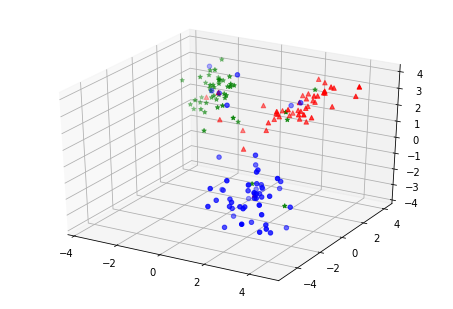

In [29]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_train['att1'][y_predict==0],x_train['att2'][y_predict==0], x_train['att3'][y_predict==0], marker='^', color='red')
ax.scatter(x_train['att1'][y_predict==1],x_train['att2'][y_predict==1], x_train['att3'][y_predict==1], marker='*', color='green')
ax.scatter(x_train['att1'][y_predict==2],x_train['att2'][y_predict==2], x_train['att3'][y_predict==2], marker='o', color='blue')

plt.show()

# Testing with data testing

In [30]:
test = pd.read_csv('data_test_PNN_HIW.csv')
test.sample()

x_test = test[['att1', 'att2', 'att3']]

# Visualisasi data uji

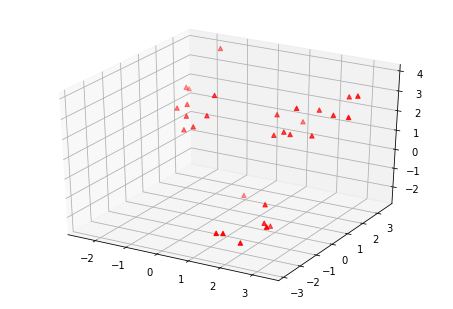

In [31]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_test['att1'],x_test['att2'],x_test['att3'], marker='^', color='red')
plt.show()

# melakukan prediksi

In [32]:
x_test_matrix = x_test.as_matrix()
y_predict_testing = []
for x in x_test_matrix:
    y_predict_testing.append( predict(x))

label_0 = 4.78649020754e-15
label_1 = 1.75954699426e-151
label_2 = 0.239512754781


label_0 = 1.59541564919e-42
label_1 = 1.50410044805e-189
label_2 = 9.12396698717e-214


label_0 = 2.76701263641e-18
label_1 = 0.0
label_2 = 0.0


label_0 = 2.07443862714e-38
label_1 = 9.32486747063e-13
label_2 = 0.0


label_0 = 3.9919863953e-87
label_1 = 0.0
label_2 = 0.0


label_0 = 1.76319168189e-16
label_1 = 6.7761900646e-231
label_2 = 6.08818966936e-204


label_0 = 6.58204775456e-39
label_1 = 5.01612852357e-47
label_2 = 3.77294238818e-163


label_0 = 1.50766468751e-17
label_1 = 1.22602129958e-44
label_2 = 6.37413833767e-254


label_0 = 2.30763388106e-19
label_1 = 9.59685587285e-29
label_2 = 0.0


label_0 = 1.47947651769e-17
label_1 = 6.75727315186e-216
label_2 = 1.61478435798e-96


label_0 = 1.99621455516e-47
label_1 = 1.36143963119e-23
label_2 = 1.08495356382e-34


label_0 = 2.48391956334e-108
label_1 = 0.00179723711919
label_2 = 2.99797336822e-63


label_0 = 4.09196225689e-96
label_1 = 1.115800565

In [33]:
y_predict_testing = pd.Series(y_predict_testing)
type(y_predict)

pandas.core.series.Series

# Visualisasi hasil uji

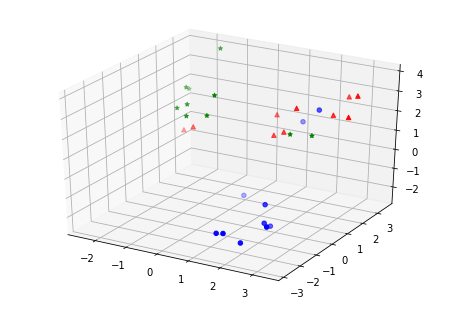

In [34]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_test['att1'][y_predict_testing==0],x_test['att2'][y_predict_testing==0], x_test['att3'][y_predict_testing==0], marker='^', color='red')
ax.scatter(x_test['att1'][y_predict_testing==1],x_test['att2'][y_predict_testing==1], x_test['att3'][y_predict_testing==1], marker='*', color='green')
ax.scatter(x_test['att1'][y_predict_testing==2],x_test['att2'][y_predict_testing==2], x_test['att3'][y_predict_testing==2], marker='o', color='blue')

plt.show()

In [35]:
y_predict_testing

0     2
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    2
16    1
17    1
18    1
19    0
20    2
21    2
22    2
23    1
24    0
25    2
26    2
27    2
28    2
29    2
dtype: int64

In [45]:
df = pd.DataFrame(y_predict_testing, columns = ['label'])
print(df)
df.to_csv('Predict.csv')

    label
0       2
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      1
12      1
13      1
14      1
15      2
16      1
17      1
18      1
19      0
20      2
21      2
22      2
23      1
24      0
25      2
26      2
27      2
28      2
29      2
